In [9]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from transformers import VisionEncoderDecoderModel,ViTFeatureExtractor,ViTImageProcessor,AutoTokenizer
import cv2
from PIL import Image
import torch

In [11]:
model=VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor=ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer=AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")



In [12]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [13]:
def image_predict(img):
  pixel_values=feature_extractor(images=[img],return_tensors="pt").pixel_values
  pixel_values=pixel_values.to(device)
  max_length=128
  output=model.generate(pixel_values,num_beams=4,max_length=max_length)
  preds=tokenizer.decode(output[0],skip_special_tokens=True)
  print(preds)

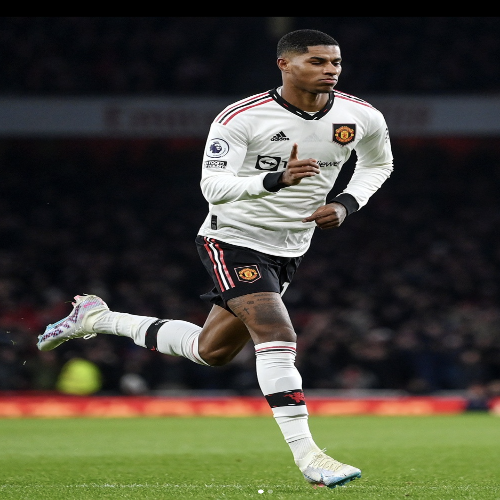

a man kicking a soccer ball on a field 


In [15]:
from google.colab.patches import cv2_imshow
image_path="/content/Image1.png"
image=cv2.imread(image_path)
image=cv2.resize(image,(500,500))
cv2_imshow(image)
image_predict(image)

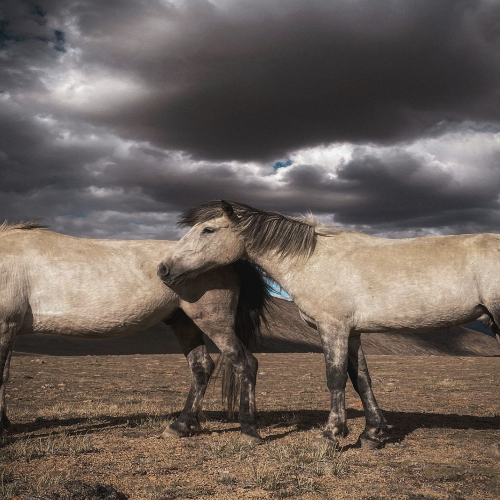

a woman standing on top of a horse in a field 


In [16]:
image_path="/content/Image2.png"
image=cv2.imread(image_path)
image=cv2.resize(image,(500,500))
cv2_imshow(image)
image_predict(image)

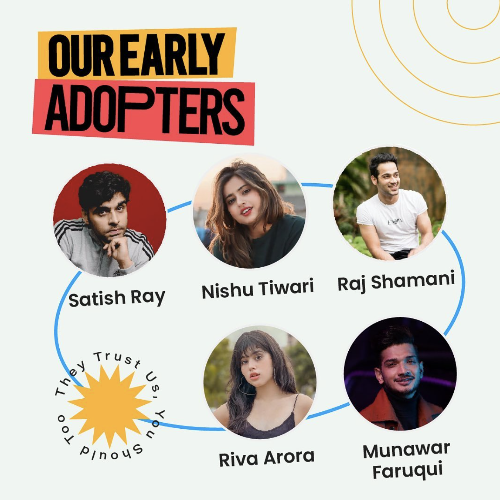

a collage of photos showing different types of food 


In [19]:
image_path="/content/Image3.png"
image=cv2.imread(image_path)
image=cv2.resize(image,(500,500))
cv2_imshow(image)
image_predict(image)